In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from IPython.display import display
import pickle
import matplotlib as mpl

Wald-Wolfowitz runs test utilizando código del libro Python Data Análisis Cookbook.

[Referencia](https://en.wikipedia.org/wiki/Wald%E2%80%93Wolfowitz_runs_test) para las ecuaciones 

In [2]:
#Función para contar el numero de runs 
def count_runs(signs):
    nruns = 0
    prev = None
    for s in signs:
        if s!=0 and s != prev:
            nruns += 1
        prev = s
    return nruns

In [10]:
#Funcion para calcular el valor medio, la desv estandar y el z-score
def proc_runs(ticker):
    stock = pd.read_csv('/home/matimacazaga/Documents/Universidad/Tesis/CSV/'+ticker+'.csv',sep=',')
    if len(stock)<2000:
        return np.nan,np.nan,np.nan
    stock = stock[stock['cierre'] != 0]
    cierres = stock['cierre'].values
    returns = np.diff(cierres)
    nplus = (returns > 0).sum()
    nmin = (returns < 0).sum()
    n = nplus + nmin
    mean = (2* (nplus * nmin) / n) + 1
    var = (mean-1) * (mean-2) / (n-1)
    std = np.sqrt(var)
    signs = np.sign(returns)
    nruns = count_runs(np.diff(signs))
    return mean, std, (nruns - mean) / std

In [11]:
tickers = pickle.load(open('/home/matimacazaga/Documents/Universidad/Tesis/tickers.p','rb'))

In [12]:
display(tickers)

['BHIP',
 'BOLT',
 'BPAT',
 'BRIO',
 'BRIO6',
 'BYMA',
 'CADO',
 'CAPU',
 'CAPX',
 'CARC',
 'CELU',
 'CEPU',
 'CGPA2',
 'COLO',
 'CVH',
 'DYCA',
 'FERR',
 'FIPL',
 'GARO',
 'GCLA',
 'GRIM',
 'HAVA',
 'INDU',
 'INTR',
 'IRSA',
 'LEDE',
 'LONG',
 'METR',
 'MOLA',
 'MOLI',
 'OEST',
 'PATA',
 'PATY',
 'PESA',
 'PGR',
 'POLL',
 'PSUR',
 'RIGO',
 'ROSE',
 'SEMI',
 'STD',
 'SUPV',
 'TEF',
 'TGLT',
 'VALO',
 'AGRO',
 'ALUA',
 'APBR',
 'AUSO',
 'BMA',
 'CECO2',
 'COME',
 'CRES',
 'CTIO',
 'DGCU2',
 'EDN',
 'ERAR',
 'FRAN',
 'GGAL',
 'JMIN',
 'MIRG',
 'PAMP',
 'PETR',
 'SAMI',
 'TECO2',
 'TGNO4',
 'TGSU2',
 'TRAN',
 'TS',
 'YPFD']

In [13]:
df = pd.DataFrame(columns = ['mean','std', 'Z'], index = tickers)
for ticker in tickers:
    mean, std, zscore = proc_runs(ticker)
    df.loc[ticker,'mean'] = mean
    df.loc[ticker,'std'] = std
    df.loc[ticker,'Z'] = zscore

In [15]:
print(len(df))
df.dropna(inplace = True)
print(len(df))
df.to_csv('Zscores.csv',sep=',')

70
48


In [17]:
display(df.index[0])

'BHIP'

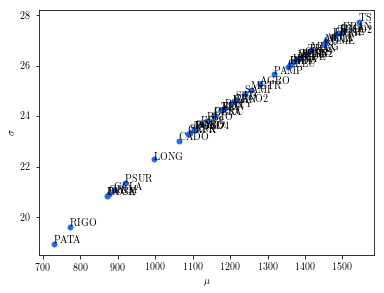

In [30]:
%matplotlib inline
plt.style.use('seaborn-paper')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
params = {
   'axes.labelsize': 10,
   'font.size': 10,
   'legend.fontsize': 10,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'figure.figsize': [6, 4.5]
   }
mpl.rcParams.update(params)

fig, ax = plt.subplots()

ax.scatter(df['mean'].values, df['std'].values, color='#1c6bf3')

for txt in df.index:
    ax.annotate(txt, (df.loc[txt,'mean'],df.loc[txt,'std']))

ax.set_xlabel(r"\textbf{$\displaystyle \mu$}")
ax.set_ylabel(r"\textbf{$\displaystyle \sigma $ }")


plt.savefig('mean_vs_std.eps', format = 'eps', dpi = 1000)

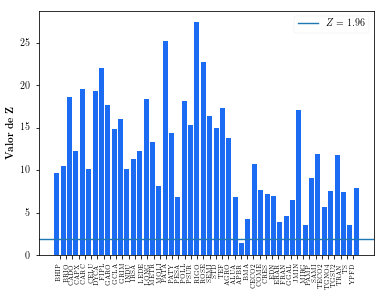

In [31]:
fig1,ax1 = plt.subplots()
x = np.linspace(0,len(df.index),len(df.index))
ax1.bar(x, df['Z'].values, color='#1c6bf3')
ax1.axhline(y = 1.96, label = r'\textbf{$\displaystyle Z=1.96 $}')
ax1.set_ylabel(r'\textbf{Valor de Z}')
ax1.set_xticks(np.arange(len(df.index)) + 0.5, minor = False)
ax1.set_xticklabels(df.index, fontsize = 6)
plt.xticks(rotation = 90)
plt.legend()
plt.savefig('z_scores.eps', format = 'eps', dpi = 1000)